In [1]:
# Импорт библииотек
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
# Удаляем первый столбец
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [6]:
# Проверяем типы данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [7]:
# Проверяем пропуски
df.isna().sum()

location     0
town         0
mortality    0
hardness     0
dtype: int64

In [8]:
# Проверяем дублирующиейся строки
df.duplicated().value_counts()

False    61
dtype: int64

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

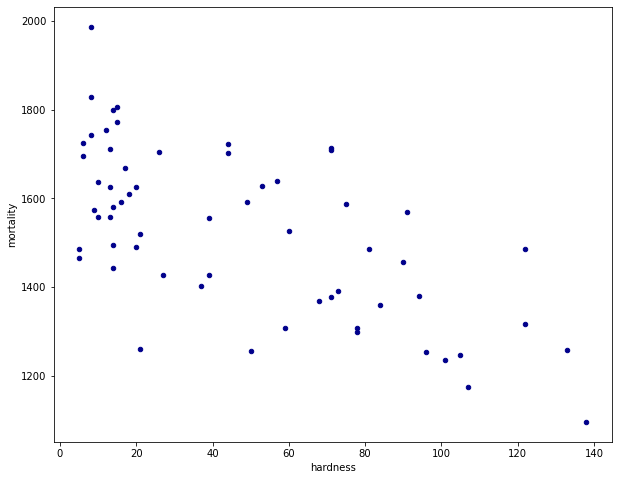

In [9]:
# Строим точечный график
df.plot.scatter(x='hardness', y='mortality', c='DarkBlue', figsize=(10, 8))

In [10]:
# Видно, что смерность уменьшается при увеличении концентрации кальция в питьевой воде
# Коэф-нт корреляции должен быть отрицательным

<AxesSubplot:>

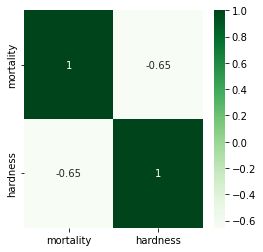

In [11]:
# Строим матрицу корреляций Пиросна
correlation_matrix = df.corr(method ='pearson')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens')

<AxesSubplot:>

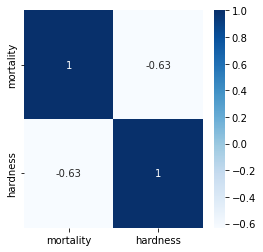

In [12]:
# Строим матрицу корреляций Спирмена
correlation_matrix = df.corr(method ='spearman')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')

In [13]:
# Видим, что корреляция есть и она отрицательная, то есть наше предположение верное

In [14]:
# Разделяем данные на тестовую и обучающую выборки
X = df[['hardness']]
y = df[['mortality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
# Строим модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Делаем предсказания
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [17]:
print(f'Коэф-нт: {model.coef_[0]}')
print(f'Остаточный член: {model.intercept_}')

Коэф-нт: [-3.1580581]
Остаточный член: [1682.15072384]


Text(0, 0.5, 'Смертность')

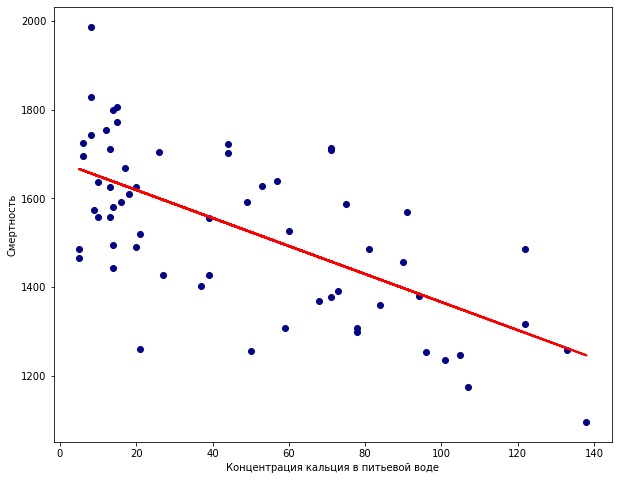

In [18]:
# Нарисуем на графике полученную прямую
plt.subplots(figsize=(10, 8))
plt.scatter(X, y, c='DarkBlue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Концентрация кальция в питьевой воде')
plt.ylabel('Смертность')

In [19]:
# Вычислим коэ-нт детерминации
print(f'Коэф-нт детерминации train: {r2_score(y_train, pred_train)}')
print(f'Коэф-нт детерминации test: {r2_score(y_test, pred_test)}')

Коэф-нт детерминации train: 0.3886432875455488
Коэф-нт детерминации test: 0.5481523380478392


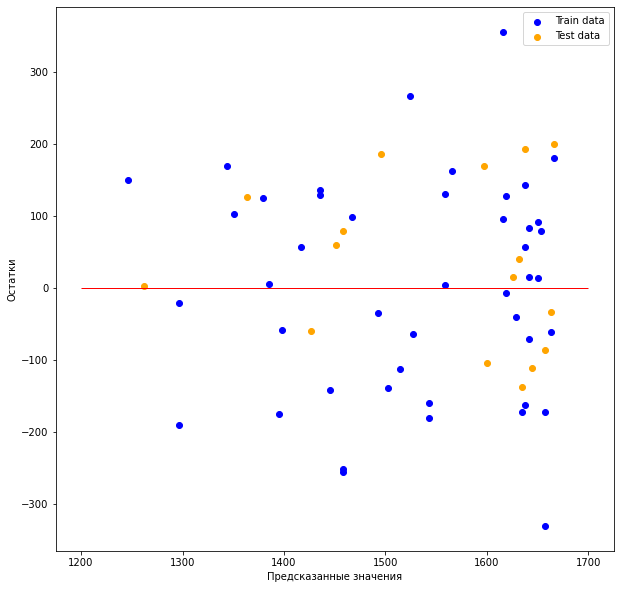

In [20]:
# Нарисуем график остатков
plt.subplots(figsize=(10, 10))
plt.scatter(pred_train,  pred_train - y_train, c='blue', label='Train data')
plt.scatter(pred_test,  pred_test - y_test, c='orange', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend()
plt.hlines(y=0, xmin=1200, xmax=1700, lw=1, color='red')

In [21]:
# Остатки распределены по обе стороны от горизонтальной оси, значит наша модель подогнана к нашим данным хорошо

In [22]:
df['location'].value_counts()

North    35
South    26
Name: location, dtype: int64

In [23]:
# Разделяем данные на 2 группы
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

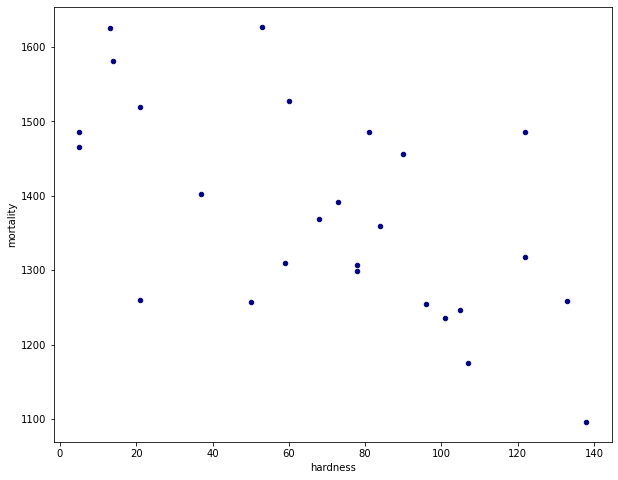

In [24]:
df_south.plot.scatter(x='hardness', y='mortality', c='DarkBlue', figsize=(10, 8))

In [25]:
# В южным регионах зависимость также прослеживается

<AxesSubplot:>

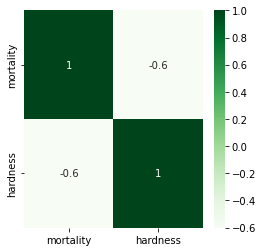

In [26]:
correlation_matrix_south = df_south.corr(method ='pearson')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix_south, annot=True, cmap='Greens')

<AxesSubplot:>

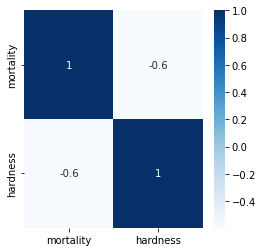

In [27]:
correlation_matrix_south = df_south.corr(method ='spearman')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix_south, annot=True, cmap='Blues')

In [28]:
X = df_south[['hardness']]
y = df_south[['mortality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Коэф-нт: {model.coef_[0]}')
print(f'Остаточный член: {model.intercept_}')

Коэф-нт: [-2.22339177]
Остаточный член: [1529.91904905]


Text(0, 0.5, 'Смертность')

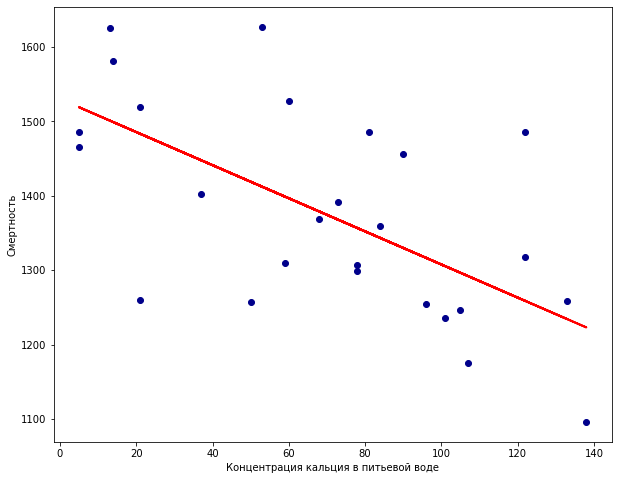

In [29]:
plt.subplots(figsize=(10, 8))
plt.scatter(X, y, c='DarkBlue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Концентрация кальция в питьевой воде')
plt.ylabel('Смертность')

In [30]:
print(f'Коэф-нт детерминации train: {r2_score(y_train, pred_train)}')
print(f'Коэф-нт детерминации test: {r2_score(y_test, pred_test)}')

Коэф-нт детерминации train: 0.3916649809331004
Коэф-нт детерминации test: 0.20027428278510373


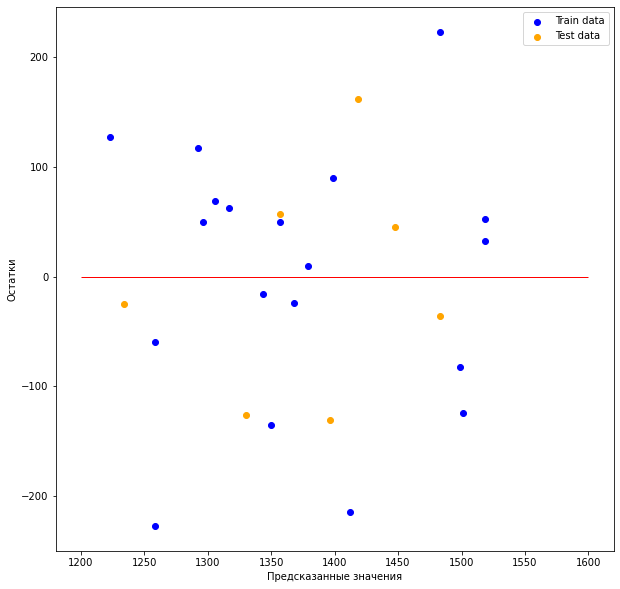

In [31]:
plt.subplots(figsize=(10, 10))
plt.scatter(pred_train,  pred_train - y_train, c='blue', label='Train data')
plt.scatter(pred_test,  pred_test - y_test, c='orange', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend()
plt.hlines(y=0, xmin=1200, xmax=1600, lw=1, color='red')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

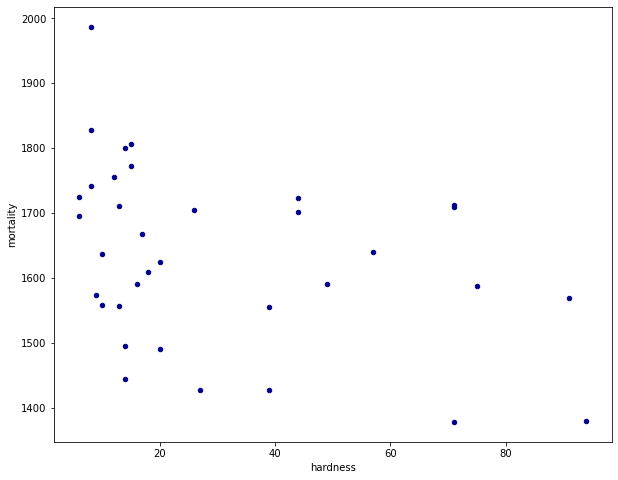

In [32]:
df_north.plot.scatter(x='hardness', y='mortality', c='DarkBlue', figsize=(10, 8))

In [33]:
# На севере зависимость прослеживается хуже

<AxesSubplot:>

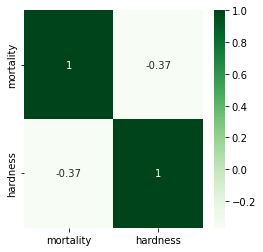

In [34]:
correlation_matrix_north = df_north.corr(method ='pearson')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix_north, annot=True, cmap='Greens')

<AxesSubplot:>

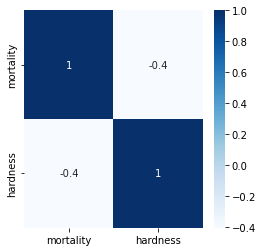

In [35]:
correlation_matrix_north = df_north.corr(method ='spearman')

plt.subplots(figsize=(4, 4))
sns.heatmap(data=correlation_matrix_north, annot=True, cmap='Blues')

In [36]:
X = df_north[['hardness']]
y = df_north[['mortality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print(f'Коэф-нт: {model.coef_[0]}')
print(f'Остаточный член: {model.intercept_}')

Коэф-нт: [-2.04436826]
Остаточный член: [1696.38342479]


Text(0, 0.5, 'Смертность')

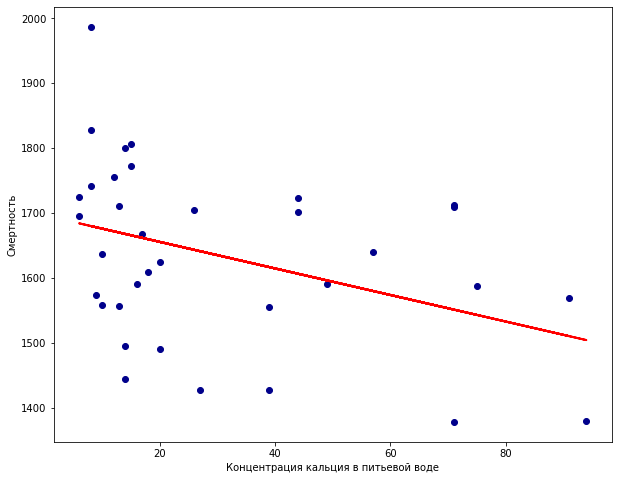

In [44]:
plt.subplots(figsize=(10, 8))
plt.scatter(X, y, c='DarkBlue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Концентрация кальция в питьевой воде')
plt.ylabel('Смертность')

In [45]:
print(f'Коэф-нт детерминации train: {r2_score(y_train, pred_train)}')
print(f'Коэф-нт детерминации test: {r2_score(y_test, pred_test)}')

Коэф-нт детерминации train: 0.11873858701366402
Коэф-нт детерминации test: 0.15360378366431915


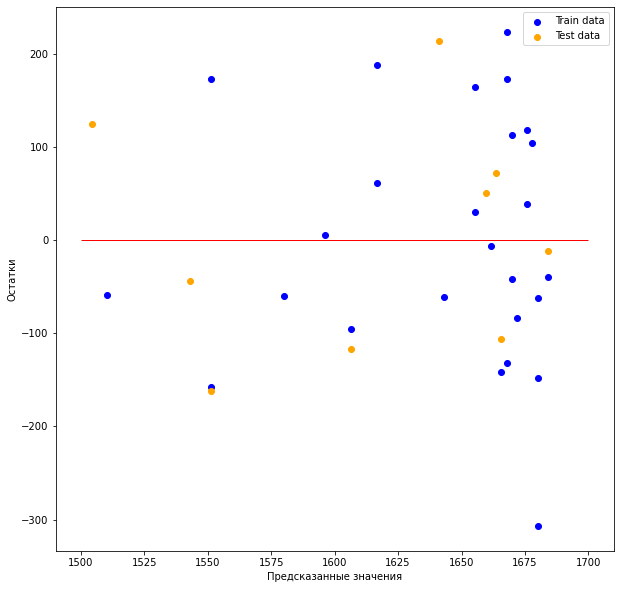

In [46]:
plt.subplots(figsize=(10, 10))
plt.scatter(pred_train,  pred_train - y_train, c='blue', label='Train data')
plt.scatter(pred_test,  pred_test - y_test, c='orange', label='Test data')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend()
plt.hlines(y=0, xmin=1500, xmax=1700, lw=1, color='red')

In [40]:
# В южных регионах зависимость между смерностью и концентрацией кальция в питьевой воде сильнее, чем в северных регионах